In [1]:
from numpy import array
from random import randint 
import random
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import math

# Triangulo de Shierpinski

In [2]:
def encontrarPuntoShierpinski(x, y):
    xf = (x[0]/2)+y[0]
    yf =  (x[1])/2+y[1]
    return xf,yf


In [3]:
def calculateShierpinski(iteraciones):
    f1 = (0.,0.)
    f2 = (0.5,0.)
    f3 = (0.25, 0.5)

    f = [f1, f2, f3]
    p0 = (0, 0)
    triangulo = [p0]

    for i in range(iteraciones):
        function_selector=(randint(1, 100))
        if(function_selector<=33):
            function_selector=0
        elif(function_selector>33 and function_selector<=66):
            function_selector=1
        elif(function_selector>66):
            function_selector=2
        factor = f[function_selector]
        puntoActual = triangulo[-1]
        triangulo.append(encontrarPuntoShierpinski(puntoActual,factor))
    return(triangulo)


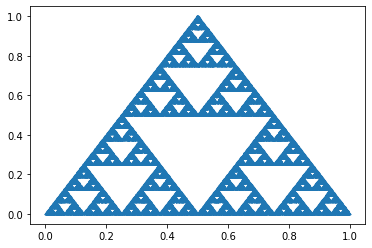

In [4]:
triangulo = array(calculateShierpinski(100000))
plt.scatter(triangulo[:,0], triangulo[:,1],s=0.5)
plt.show()

# El helecho de Barnsley

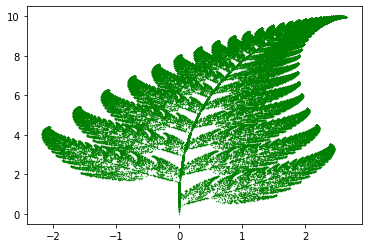

In [5]:
def f1(x,y):
    return((x*0.85 + y*0.04 + 0.0, x*-0.04 + y*0.85 + 1.6))
def f2(x,y):
    return((-0.15*x + 0.28*y + 0.0, x*0.26 + y*0.24 + 0.44))
def f3(x,y):
    return((x*0.2 + y*-0.26 + 0.0, x*0.23 + y*0.22 + 1.6))
def f4(x,y):
    return((x*0.0 + y*0.0, x*0.0 + y*0.16))
def Barnsley(iteraciones):
    p0 = (0, 0)
    helecho = [p0]
    for i in range(iteraciones):
        function_selector=(randint(1, 100))
        if(function_selector<=85):
            helecho.append(f1(helecho[-1][0],helecho[-1][1]))
        elif(function_selector<=92):
            helecho.append(f2(helecho[-1][0],helecho[-1][1]))
        elif(function_selector<=99):
            helecho.append(f3(helecho[-1][0],helecho[-1][1]))
        elif(function_selector>99):
            helecho.append(f4(helecho[-1][0],helecho[-1][1]))
    return(helecho)
helecho = array(Barnsley(100000))
plt.scatter(helecho[:,0], helecho[:,1],s=0.1,color="green")
plt.show()        

# Análisis de pseudorandoms

In [6]:
def generador1(xo, n):
    mod = pow(2,35)-1
    items = []
    items.append(xo % mod)
    for i in range(1, n):
        items.append((pow(5,5) * items[i - 1]) % mod)
    return [i / float(mod) for i in items]
def generador2(xo, n):
    mod = pow(2,31)-1
    items = []
    items.append(xo % mod)
    for i in range(1, n):
        items.append((pow(7,5) * items[i - 1]) % mod)
    return [i / float(mod) for i in items]
def randomPython(n):
    items=[]
    for i in range(n):
        items.append(random.random())
    return(items)
def histogramaAsteriscos(lista):
    long=len(lista)
    stringFinal=""
    for i in range(1,11):
        cont=0
        threshold=i/10
        stringAsth=str(round(threshold-0.1,1))+" - "+str(threshold)+":"
        for l in lista:
            if (l>threshold-0.1 and l<=threshold):
                cont=cont+1
        sep=long/100
        sep=(round(cont/sep))
        porc=(cont/long)*100
        for l in range(sep):
            stringAsth=stringAsth+" * "
        stringAsth=stringAsth+str(cont)+"({:.2f}%)".format(porc)
        stringFinal=stringFinal+stringAsth+"\n"
    return(stringFinal)

In [7]:
n=100
print(str(n)+" Iteraciones:")
print("Generador 1")
print(histogramaAsteriscos(generador1(20,n)))
print("Generador 2")
print(histogramaAsteriscos(generador2(20,n)))
print("Python rand")
print(histogramaAsteriscos(randomPython(n)))

100 Iteraciones:
Generador 1
0.0 - 0.1: *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 16(16.00%)
0.1 - 0.2: *  *  *  *  *  *  *  *  *  * 10(10.00%)
0.2 - 0.3: *  *  *  *  *  *  *  * 8(8.00%)
0.3 - 0.4: *  *  *  *  *  *  *  *  *  *  *  *  * 13(13.00%)
0.4 - 0.5: *  *  *  *  *  *  *  * 8(8.00%)
0.5 - 0.6: *  *  *  *  *  *  * 7(7.00%)
0.6 - 0.7: *  *  *  *  *  *  *  *  *  *  *  * 12(12.00%)
0.7 - 0.8: *  *  *  * 4(4.00%)
0.8 - 0.9: *  *  *  *  *  *  *  *  *  *  *  * 12(12.00%)
0.9 - 1.0: *  *  *  *  *  *  *  *  *  * 10(10.00%)

Generador 2
0.0 - 0.1: *  *  *  *  *  *  *  *  *  *  *  * 12(12.00%)
0.1 - 0.2: *  *  *  *  *  *  * 7(7.00%)
0.2 - 0.3: *  *  *  *  *  *  *  *  * 9(9.00%)
0.3 - 0.4: *  *  *  *  *  *  *  *  *  *  *  *  *  * 14(14.00%)
0.4 - 0.5: *  *  *  *  *  *  * 7(7.00%)
0.5 - 0.6: *  *  *  *  *  *  *  *  *  *  *  * 12(12.00%)
0.6 - 0.7: *  *  *  *  *  *  *  *  *  *  *  *  *  * 14(14.00%)
0.7 - 0.8: *  *  *  *  *  *  *  *  *  * 10(10.00%)
0.8 - 0.9: *  *  *  *  *  *  * 7(7.00%)

In [8]:
n=5000
print(str(n)+" Iteraciones:")
print("Generador 1")
print(histogramaAsteriscos(generador1(20,n)))
print("Generador 2")
print(histogramaAsteriscos(generador2(20,n)))
print("Python rand")
print(histogramaAsteriscos(randomPython(n)))

5000 Iteraciones:
Generador 1
0.0 - 0.1: *  *  *  *  *  *  *  *  *  * 492(9.84%)
0.1 - 0.2: *  *  *  *  *  *  *  *  *  * 483(9.66%)
0.2 - 0.3: *  *  *  *  *  *  *  *  *  * 493(9.86%)
0.3 - 0.4: *  *  *  *  *  *  *  *  *  * 499(9.98%)
0.4 - 0.5: *  *  *  *  *  *  *  *  * 466(9.32%)
0.5 - 0.6: *  *  *  *  *  *  *  *  *  * 516(10.32%)
0.6 - 0.7: *  *  *  *  *  *  *  *  *  *  * 544(10.88%)
0.7 - 0.8: *  *  *  *  *  *  *  *  *  * 496(9.92%)
0.8 - 0.9: *  *  *  *  *  *  *  *  *  * 518(10.36%)
0.9 - 1.0: *  *  *  *  *  *  *  *  *  * 493(9.86%)

Generador 2
0.0 - 0.1: *  *  *  *  *  *  *  *  *  * 501(10.02%)
0.1 - 0.2: *  *  *  *  *  *  *  *  *  * 488(9.76%)
0.2 - 0.3: *  *  *  *  *  *  *  *  *  * 494(9.88%)
0.3 - 0.4: *  *  *  *  *  *  *  *  *  * 508(10.16%)
0.4 - 0.5: *  *  *  *  *  *  *  *  *  * 497(9.94%)
0.5 - 0.6: *  *  *  *  *  *  *  *  *  * 503(10.06%)
0.6 - 0.7: *  *  *  *  *  *  *  *  *  *  * 528(10.56%)
0.7 - 0.8: *  *  *  *  *  *  *  *  *  * 486(9.72%)
0.8 - 0.9: *  *  *  *  *  *  

In [9]:
n=100000
print(str(n)+" Iteraciones:")
print("Generador 1")
print(histogramaAsteriscos(generador1(20,n)))
print("Generador 2")
print(histogramaAsteriscos(generador2(20,n)))
print("Python rand")
print(histogramaAsteriscos(randomPython(n)))

100000 Iteraciones:
Generador 1
0.0 - 0.1: *  *  *  *  *  *  *  *  *  * 10140(10.14%)
0.1 - 0.2: *  *  *  *  *  *  *  *  *  * 10273(10.27%)
0.2 - 0.3: *  *  *  *  *  *  *  *  *  * 9849(9.85%)
0.3 - 0.4: *  *  *  *  *  *  *  *  *  * 9860(9.86%)
0.4 - 0.5: *  *  *  *  *  *  *  *  *  * 9704(9.70%)
0.5 - 0.6: *  *  *  *  *  *  *  *  *  * 10409(10.41%)
0.6 - 0.7: *  *  *  *  *  *  *  *  *  * 9970(9.97%)
0.7 - 0.8: *  *  *  *  *  *  *  *  *  * 9967(9.97%)
0.8 - 0.9: *  *  *  *  *  *  *  *  *  * 10093(10.09%)
0.9 - 1.0: *  *  *  *  *  *  *  *  *  * 9735(9.74%)

Generador 2
0.0 - 0.1: *  *  *  *  *  *  *  *  *  * 9829(9.83%)
0.1 - 0.2: *  *  *  *  *  *  *  *  *  * 9964(9.96%)
0.2 - 0.3: *  *  *  *  *  *  *  *  *  * 9925(9.93%)
0.3 - 0.4: *  *  *  *  *  *  *  *  *  * 9957(9.96%)
0.4 - 0.5: *  *  *  *  *  *  *  *  *  * 9930(9.93%)
0.5 - 0.6: *  *  *  *  *  *  *  *  *  * 10025(10.03%)
0.6 - 0.7: *  *  *  *  *  *  *  *  *  * 10085(10.08%)
0.7 - 0.8: *  *  *  *  *  *  *  *  *  * 10104(10.10%)
0.8 -

Generador 2 es el que me quedaría

# Integral Unidimensional

Integral original

$$ \theta=\int_{-\infty}^{\infty}e^{-x^{2}}dx $$

Al ser integral par $$(x)^{2}=(-x)^{2}$$
se puede dividir en  sobre 0

$$ \theta=\int_{-\infty}^{\infty}e^{-x^{2}}dx = 2*\int_{0}^{\infty}e^{-x^{2}}dx $$ 

Convertir a integral completamente impropia

$$ h(y) = \frac{g(\frac{1}{y} - 1)}{y^{2}} $$ 

$$\theta=2*\int_{0}^{1}\frac{e^{-(\frac{1}{y} - 1)^{2}}}{y^{2}}dy$$

In [10]:
def integral_unidimensional(y):
    return(2*math.exp(-((1/y)-1)**2)/(y**2))

def montecarlo_unidimensional(iteraciones):
    listaRes=[]
    nums=randomPython(iteraciones)
    for i in nums:
        listaRes.append(integral_unidimensional(i))
    return listaRes

Iter100=montecarlo_unidimensional(100)
Iter10000=montecarlo_unidimensional(10000)
Iter1000000=montecarlo_unidimensional(1000000)
print("100 iteraciones:",sum(Iter100)/len(Iter100))
print("10000 iteraciones:",sum(Iter10000)/len(Iter10000))
print("1000000 iteraciones:",sum(Iter1000000)/len(Iter1000000))

100 iteraciones: 1.755376668315885
10000 iteraciones: 1.8129874546016156
1000000 iteraciones: 1.7727526059246985


# Integral bidimensional

$$ \theta=\int_{0}^{\infty}\int_{0}^{x}e^{-(x+y)}dy dx $$

$$\theta=\int_{0}^{\infty} (e^{-x} - e^{-2x}) dx$$

$$ h(y) = \frac{g(\frac{1}{y} - 1)}{y^{2}} $$ 

$$\theta=\int_{0}^{1} \frac{e^{-(\frac{1}{y} - 1)}}{y^2} - \frac{e^{-2(\frac{1}{y} - 1)}}{y^{2}} dy $$ 

In [11]:
def integral_biidimensional(y):
    return((math.exp(-((1/y)-1))/(y**2))-(math.exp(-2*((1/y)-1))/(y**2)))

def montecarlo(iteraciones):
    listaRes=[]
    nums=randomPython(iteraciones)
    for i in nums:
        listaRes.append(integral_biidimensional(i))
    return listaRes

Iter100=montecarlo(100)
Iter10000=montecarlo(10000)
Iter1000000=montecarlo(1000000)
print("100 iteraciones:",sum(Iter100)/len(Iter100))
print("10000 iteraciones:",sum(Iter10000)/len(Iter10000))
print("1000000 iteraciones:",sum(Iter1000000)/len(Iter1000000))

100 iteraciones: 0.546492761815718
10000 iteraciones: 0.5045946639321057
1000000 iteraciones: 0.5000795119337477
